# Introduction to Probabilistic Graphical Models

# Practical Session I

**GOMEZ Enrique - GHRIBI Saife Eddine**

In [0]:
import numpy as np 

## Question 0

We implemented this function in order to avoid NaN when finding the log of a sum of exponentials.

In [0]:
def logsumexp(v):
  v_max=max(v)
  return  v_max+np.log(np.sum([np.exp(i- v_max )for i in v]))

In [306]:
logsumexp([-1234,-1235])

-1233.6867383124818

## Question  1

Let { $X_k: k \in \mathbb{N}$ } be a sequence of random variables representing  the position of the robot at time k, whose domain is [1,..,N].
<br> 
Let { $Y_k: k \in \mathbb{N}$ } be a sequence of random variables representing the noisy observations of the position of the robot, whose domain is [1,..,N].
<br> 

The following image represents the generative model of our variables. As every observation dependends only on the respective position and every position depends only on the last one, this is a HMM.

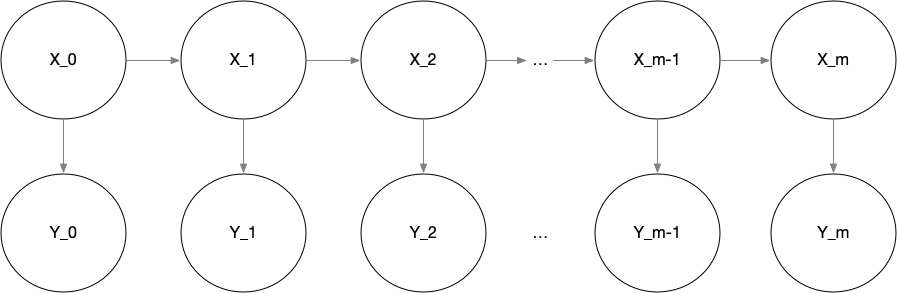

## Question 2



Let { $X_k: k \in \mathbb{N}$ } be a suite of random variables representing   the position of the robot at time k, whose domain is [1,..,N] 
<br> 
Let { $Y_k: k \in \mathbb{N}$ } be a suite of random variables representing the noisy observations of $X_K$, whose a domain is [1,..,N] 
<br> 
The observation probability is as follows : <br> $$ \mathbb{P}(y_n|x_n)= w\delta(y_n-x_n)+ (1-w)U\{1,..,N\} $$
<br>  with <br>  $\delta$(a)= 1  if a=0 and 0 otherwise

We have also $$ \mathbb{P}(X_{k+1}=j+1|X_k=j)=1-\epsilon$$ , $$ \mathbb{P}(X_{k+1}=j|X_k=j)=\epsilon   \ \ \        \forall j \in \{1,..,N-1\}$$ and if  $j=N$ then $j+1 =1 $


Particularly $$ \mathbb{P}(X_1=j)=\frac{1}{N}  \ \        \forall j \in \{1,..,N\}$$

### Transtion Table 

We coded a function which generates a transition matrix where each element $T_{ij} = \mathbb{P}(X_k = j|X_{k-1} = i)$. The elements of each column add 1. So this is a stochastic matrix.

In [0]:
def transition_table(N,epsilon): 
  M=.0*np.eye(N)
  for i in range (N-1): 
    if (i+1 <= N-1 ):
      M[i+1,i]=1- epsilon 
      M[i,i]=epsilon 
  M[0,N-1]=1-epsilon
  M[N-1,N-1]=epsilon    
  return M



In [308]:
# Example for  N = 10 and epsilon = 0.3 
trans=transition_table(10,0.3)
print (trans)

[[0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.7]
 [0.7 0.3 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.7 0.3 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.7 0.3 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.7 0.3 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.7 0.3 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.7 0.3 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.7 0.3 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.7 0.3 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.7 0.3]]


### Generative table

We coded a function which generates a generative matrix where each element $G_{ij} = \mathbb{P}(Y_k = j|X_{k} = i)$. The elements of each column add 1. So this is a stochastic matrix.

In [0]:
def generative_table(N,w): 
  M=np.eye(N)
  for i in range (N) : 
    for j in range (N): 
      if (i==j):
        M[i,j]=w
      else : 
        M[i,j]= (1-w)/(N-1)
  return M

In [310]:
#Example for N=5 and W=0.2
gen=generative_table(6,0.8)
print (gen )

[[0.8  0.04 0.04 0.04 0.04 0.04]
 [0.04 0.8  0.04 0.04 0.04 0.04]
 [0.04 0.04 0.8  0.04 0.04 0.04]
 [0.04 0.04 0.04 0.8  0.04 0.04]
 [0.04 0.04 0.04 0.04 0.8  0.04]
 [0.04 0.04 0.04 0.04 0.04 0.8 ]]


## Question 3

1. Distribution of the robot’s current position given the observations so far
$$ p(x_m|y_{0:m})$$
2. Distribution of the robot’s position at time step k given all the observations
$$ p(x_k|y_{0:m})$$
3. Distribution of the robot’s next position given the observations so far
$$ p(x_{m+1}|y_{0:m})$$
4. Distribution of the robot’s next sensor reading given the observations so far
$$ p(y_{m+1}|y_{0:m})$$
5. Distribution of the robot’s initial position given observations so far
$$ p(x_0|y_{0:m})$$
6. Most likely current position of the robot given the observations so far
$$ \underset{x \in \{1:N\}}{\mathrm{argmax}}{p(x_m|y_{0:m})}$$
7. Most likely trajectory taken by the robot from the start until now given the observations so far.
$$ \underset{x \in \{1:N\}^{m+1}}{\mathrm{argmax}}{p(x_{0:m}|y_{0:m})}$$

## Question 4

In [0]:
def gen_scenario(N,epsilon,w,k, verbose = False):
  # scenario : list to contain the (x_i,y_i) the position and the observation of every step 
  scenario = []
  #choose randomly the first position  
  x = np.random.randint(low=1,high = N)
  
  for i in range (k): 
    if (verbose): print ("Step : "+str(i+1))
    # x_bin is a binary variable that shows if the robot will advance or not
    if (i != 0):
        x_bin = np.random.choice([0,1],1, replace=False, p=[epsilon,1-epsilon])[0]
        if (x_bin == 1): 
          if (x+1 >= N+1):
            x_new = 1
          else :
            x_new = x+1   
          if (verbose): print ("- > pos="+str(x_new) + " (Moves)")
          x = x_new
        else :
          if (verbose): print ("- > pos="+str(x)+ " (Stays)")
    else:
        if (verbose): print ("- > pos="+str(x) + " (Initial Value)")


    y_bin = np.random.choice([0,1],1, replace=False, p=[w,1-w])[0]
    if (y_bin == 0):
      y=x
      if (verbose): print ("- - >obs="+str(y) +" (right observation)")
    else : 
      y = np.random.choice([i for i in range(1,N+1) if i != x])
      if (verbose): print ("- - >Obs="+str(y) + " (wrong observation)")
    scenario.append((x,y)) 
  return scenario

In [312]:
#Scenario with k=20
scenario = gen_scenario(N = 10,epsilon = 0.3,w = 0.4,k = 15, verbose = True)

Step : 1
- > pos=2 (Initial Value)
- - >obs=2 (right observation)
Step : 2
- > pos=2 (Stays)
- - >Obs=10 (wrong observation)
Step : 3
- > pos=2 (Stays)
- - >Obs=7 (wrong observation)
Step : 4
- > pos=3 (Moves)
- - >obs=3 (right observation)
Step : 5
- > pos=4 (Moves)
- - >Obs=1 (wrong observation)
Step : 6
- > pos=5 (Moves)
- - >Obs=2 (wrong observation)
Step : 7
- > pos=6 (Moves)
- - >obs=6 (right observation)
Step : 8
- > pos=7 (Moves)
- - >Obs=5 (wrong observation)
Step : 9
- > pos=8 (Moves)
- - >Obs=7 (wrong observation)
Step : 10
- > pos=8 (Stays)
- - >Obs=2 (wrong observation)
Step : 11
- > pos=9 (Moves)
- - >Obs=7 (wrong observation)
Step : 12
- > pos=10 (Moves)
- - >Obs=1 (wrong observation)
Step : 13
- > pos=1 (Moves)
- - >Obs=2 (wrong observation)
Step : 14
- > pos=1 (Stays)
- - >Obs=10 (wrong observation)
Step : 15
- > pos=1 (Stays)
- - >Obs=6 (wrong observation)


In [0]:
scenario = gen_scenario(N = 10,epsilon = 0.3,w = 0.4,k = 100, verbose = False)

## Question 5

In [0]:

# We initialize the values, the parameters, the stochastic matrices and the scenario 
N   = 50
eps = 0.3
w   = 0.8
k   = 100
scenario = gen_scenario(N,eps,w,k)
trans=transition_table(N,eps)
gen=generative_table(N,w)
init_prob = np.ones(N)/N

In [0]:
def logAexp(v,A):
  #Sum of log exp when there is a matrix A multiplying the exponential of v
  v_max=max(v)
  return  v_max+np.log(A @ np.exp(v - v_max))

def log_alpha(l, r, scen, i_prob, t_mtx, g_mtx):
  '''
  This method computes the alpha_r_l given a scenario, an initial probability 
  vector, a transition matrix and an observation matrix.
  The alpha is equivalent to p(X_r,Y_1:l) where l=r or l-1=r. 
  Output: A vector where each element i corresponds to p(X_r=i,Y_1:l)
  '''
  # Initial probability
  if (r==0):
    return np.log(init_prob)
  # Computation of alpha_l_l. It uses alpha_l_l-1 and the row matching the Y_l
  # observation of the observation matrix which corresponds to p(Y_l| X_l) 
  # for every x
  elif (l == r):
    idx = scenario[r-1][1] - 1
    return np.log(g_mtx[idx,:]) + log_alpha(l,r-1, scen, i_prob, t_mtx, g_mtx)
  # Computation of alpha_l_l-1. It uses alpha_l-1_l-1 and the transition matrix
  # to compute that value for every x
  else:
    return logAexp(log_alpha(l-1, r, scen, i_prob, t_mtx, g_mtx),t_mtx) 
  
def log_beta(l,r, scen, i_prob, t_mtx, g_mtx):
  '''
  This method computes the beta_l_r given a scenario, an initial probability 
  vector, a transition matrix and an observation matrix.
  The beta is equivalent to p(Y_r:N,X_l) where l=r or l=r-1. 
  Output: A vector where each element i corresponds to p(Y_r:N,X_l=i)
  '''
  k = len(scen)
  if (r == k+1):
    # Initialization (log(1) = 0)
    return np.zeros(np.shape(t_mtx)[0])
  # Computation of beta_l_l. It uses beta_l_l+1 and the row matching the Y_l
  # observation of the observation matrix which corresponds to p(Y_l| X_l) 
  # for every x
  elif (l == r):
    idx = scenario[r-1][1] - 1
    return np.log(g_mtx[:,idx]) + log_beta(l,r+1,scen, i_prob, t_mtx, g_mtx)
  # Computation of beta_l_l+1. It uses beta_l+1_l+1 and the transition matrix
  # to compute that value for every x
  else:
    return logAexp(log_beta(l+1, r, scen, i_prob, t_mtx, g_mtx),t_mtx.T)
  
  
def forward_backward(scenario, init_prob, trans_matrix, gen_matrix, t=False):
  '''
  This algorithm applies the forward-backward algorithm. If there is a
  parameter time t given, it computes the probability of all the states at
  that specific time given the observations. Otherwise, it computes that 
  probability for the current state.
  '''
  N = len(scenario)
  alpha = np.exp(log_alpha(N,N,scenario,init_prob,trans_matrix,gen_matrix))
  if not t:
    return alpha / np.sum(alpha)
  else:
    alpha_log_t = log_alpha(t,t,scenario, init_prob, trans_matrix,gen_matrix)
    bet_log  = log_beta(t, t+1, scenario, init_prob, trans_matrix, gen_matrix)
    return np.exp(alpha_log_t + bet_log)/np.sum(alpha)


In [316]:
A = forward_backward(scenario, init_prob, trans, gen, t=False)
print("Distribution of robot's current position: \n",A)
print ("sum(A) = " + str(np.sum(A)) )  

Distribution of robot's current position: 
 [2.03992843e-96 5.11104096e-93 2.72940965e-91 3.56569526e-89
 3.41945732e-85 2.35323184e-79 1.18309858e-76 9.87423538e-72
 5.31756192e-69 2.45316630e-66 1.87012724e-61 1.35231971e-59
 4.03469577e-56 7.07724464e-49 3.64957116e-46 3.16082303e-43
 2.75078942e-38 1.33513373e-35 5.64498755e-34 1.16761232e-32
 1.73823483e-29 1.22101869e-28 4.95640607e-20 1.20381916e-19
 1.04739568e-14 4.98570276e-12 2.27055010e-09 1.03311150e-06
 9.52001101e-06 1.10778479e-03 9.93001020e-01 5.88064016e-03
 4.31139251e-13 1.14556968e-13 1.29754076e-15 4.26417138e-22
 4.73752243e-24 1.43152069e-30 2.20824931e-37 1.50955648e-41
 1.58057121e-43 9.45663439e-48 5.65288668e-52 8.86699984e-61
 2.63924393e-64 2.52173825e-65 1.47160067e-66 8.80465499e-71
 5.26126621e-75 5.57944639e-93]
sum(A) = 0.9999999999999999


In [317]:
t = 67
B = forward_backward(scenario, init_prob, trans, gen, t=t)
print("Distribution of robot's position at time=",t,": \n",B)
print ("sum(B) = "+ str(np.sum(B)) )

Distribution of robot's position at time= 67 : 
 [1.75925860e-067 9.76879883e-062 7.23018860e-056 6.32795286e-047
 5.37603668e-039 1.48067449e-030 2.30581617e-021 3.33754877e-012
 2.57704826e-005 9.99974099e-001 1.30825358e-007 3.81123230e-016
 3.05801466e-018 1.12484965e-023 3.89120136e-035 2.62263507e-042
 6.10531778e-063 2.21750796e-072 1.11187145e-076 4.99280496e-080
 7.70278475e-086 1.10573770e-096 1.19021474e-101 8.77165566e-112
 1.38157930e-114 1.32086366e-118 3.69433071e-125 2.94977671e-136
 1.58910788e-144 5.44678069e-131 3.06252061e-129 1.45651804e-127
 7.14028586e-126 2.71186383e-124 8.37880555e-123 6.33800438e-121
 2.22944331e-118 1.00389818e-115 8.44325391e-113 7.54486026e-109
 2.34775948e-106 4.24491731e-102 1.53424691e-098 2.67743981e-095
 1.47237885e-092 8.93598744e-088 2.33196973e-085 3.92546947e-083
 1.93830400e-074 5.17797195e-070]
sum(B) = 1.0000000000004057


In [318]:
print("Most likely robot's current position: ", np.argmax(A)+1)

Most likely robot's current position:  31


## Question 6 (with kidnapping)

In this question , the transition matrix will depend on kappa ,thus a new transition table method will be implented. But it will be just a tweaked version of the one previously implemented.<br>

The scenario will therefore slightly change when adding the required changes if the robot is kidnapped<br>

Questions 4 and 5 will remain the same as the algorithm does not rely on the transition matrix (It is indeed an input).


###  Transition matrix
$\mathbb{P}(X_k|X_{k-1})=(1-\kappa) \epsilon + \frac{\kappa}{N}  $  is the probability to stay at the same position

$\mathbb{P}(X_{i+1}|X_i)=(1-\kappa) (1-\epsilon) + \frac{\kappa}{N}$ is the probability of moving to the next position . 

$\mathbb{P}(X_{i}|X_j)=\frac{\kappa}{N} \forall j \notin \{i,i+1\} $  is the probability elsewhere.

To verifiy  the probability,
$$ \sum_{i\neq j} P(X_i|X_j) =(1-\kappa) \epsilon  +(1-\kappa) (1-\epsilon) + N * \frac{\kappa}{N}= 1$$

Knowing the new distribution of $\mathbb{P}(X_k|X_{k-1})$, we coded a new generator of transition matrices, where each element $T_{ij} = \mathbb{P}(X_k = j|X_{k-1} = i)$. The elements of each column add 1. So this is a stochastic matrix.

In [0]:
def transition_table_kidnapped(N,epsilon,kappa): 
  M=.0*np.eye(N)
  for i in range (N):
    for j in range (N):      
      if (i==j): 
        M[i,j]=(1-kappa)*epsilon + kappa/N
      elif (i == j+1 ) :
        M[i,j] = (1-kappa)*(1-epsilon) + kappa/N
      else : 
        M[i,j] = kappa/N 
  M[0,N-1] =(1-kappa)*(1-epsilon) + kappa/N 
  return M

In [320]:
#example of transition matrix 
transition_table_kidnapped(10,0.3, 0.4)

array([[0.22, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.46],
       [0.46, 0.22, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.46, 0.22, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.46, 0.22, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.46, 0.22, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.46, 0.22, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.46, 0.22, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.46, 0.22, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.46, 0.22, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.46, 0.22]])

In [321]:
print (np.sum( transition_table_kidnapped(10,0.3, 0.4)[:,9] ))

1.0


In [0]:
#we can use the same function with adding a condition about kidnapping
def gen_scenario_kidnapped(N,epsilon,w,k,kappa, verbose = False):
  # scenario : list to contain the (x_i,y_i) the position and the observation of every step 
  scenario = []
  #choose randomly the first position  
  x = np.random.randint(low=1,high = N)
  
  for i in range (k): 
    if (verbose): print ("Step : "+str(i+1))
    if (i!= 0):
      # kidnapped a binary variable that show if the robot is kidnapped or not 
      kidnapped = np.random.choice([0,1],1, replace=False, p=[1-kappa,kappa])[0]
      if (kidnapped):      
        #if kidnapped the new position will be uniformaly distributed as follows 
        x_new = np.random.randint(low=1,high = N)
        if (verbose): print ("kidnapped !!! to pos=" + str(x_new))
        x = x_new

      else : 
        #if not kidnapped we use the same algorithm from question 4 
        # x_bin is a binary variable that shows if the robot will advance or not 
        x_bin = np.random.choice([0,1],1, replace=False, p=[epsilon,1-epsilon])[0]
        if (x_bin == 1): 
          if (x+1 >= N+1):
            x_new = 1
          else :
            x_new = x+1   
          if (verbose): print ("- > pos="+str(x_new) + " (Moves)")
          x = x_new
        else :
          if (verbose): print ("- > pos="+str(x)+ " (Stays)")
    else:
      if (verbose): print ("- > pos="+str(x) + " (Initial Value)")


    y_bin = np.random.choice([0,1],1, replace=False, p=[w,1-w])[0]
    if (y_bin == 0):
      y=x
      if (verbose): print ("- - >obs="+str(y) +" (right observation)")
    else : 
      y = np.random.choice([i for i in range(1,N+1) if i != x])
      if (verbose): print ("- - >Obs="+str(y) + " (wrong observation)")
    scenario.append((x,y)) 
  return scenario



In [323]:
#question 4 with kidnapping 
#example of scenario with kidnapping
scenario_kidnapped = gen_scenario_kidnapped(N = 10,epsilon = 0.3,w = 0.4,k = 5,kappa=0.3, verbose = True)

Step : 1
- > pos=4 (Initial Value)
- - >obs=4 (right observation)
Step : 2
kidnapped !!! to pos=8
- - >Obs=4 (wrong observation)
Step : 3
- > pos=9 (Moves)
- - >Obs=2 (wrong observation)
Step : 4
- > pos=9 (Stays)
- - >Obs=5 (wrong observation)
Step : 5
kidnapped !!! to pos=6
- - >Obs=1 (wrong observation)


In [0]:
#question 5 we use the same function but this time we pass the new secnario and transition matrix  as parameters
N   = 50
eps = 0.3
w   = 0.8
k   = 100
kappa = 0.1
scenario = gen_scenario_kidnapped(N,eps,w,k,kappa )
trans = transition_table_kidnapped(N,eps,kappa)
gen=generative_table(N,w)
init_prob = np.ones(N)/N

In [325]:
A = forward_backward(scenario, init_prob, trans, gen, t=False)
print("Distribution of robot's current position: \n",A)
print ("sum(A) = " + str(np.sum(A)) )  

Distribution of robot's current position: 
 [0.00144533 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533
 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533
 0.00144579 0.00186716 0.19548567 0.45192103 0.00145872 0.001446
 0.28420686 0.00145631 0.00145387 0.00144533 0.00144533 0.00144533
 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533
 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533
 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533
 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533 0.00144533
 0.00144533 0.00144533]
sum(A) = 1.0000000000000002


In [326]:
t = 67
B = forward_backward(scenario, init_prob, trans, gen, t=t)
print("Distribution of robot's position at time=",t,": \n",B)
print ("sum(B) = "+ str(np.sum(B)) )

Distribution of robot's position at time= 67 : 
 [1.67928666e-05 1.67928666e-05 1.67928666e-05 1.67928666e-05
 1.67928666e-05 1.67928666e-05 1.67928666e-05 1.67928666e-05
 1.67928666e-05 1.67928666e-05 1.67928666e-05 1.67928666e-05
 5.25027414e-03 2.27123448e-03 2.18051425e-05 1.68358955e-05
 1.67977067e-05 1.67929260e-05 1.67928709e-05 1.67928666e-05
 1.67928666e-05 1.67928666e-05 1.67928666e-05 2.13626390e-05
 2.17769268e-03 9.89402376e-01 1.68865180e-05 1.68064671e-05
 1.67929379e-05 1.67928727e-05 1.67928666e-05 1.67928666e-05
 1.67928666e-05 1.67928666e-05 1.67928666e-05 1.67928666e-05
 1.67928666e-05 1.67928666e-05 1.67928666e-05 1.67928666e-05
 1.67928666e-05 1.67928666e-05 1.67928666e-05 1.67996557e-05
 1.99711655e-05 3.88193724e-05 6.80164389e-05 5.65684146e-05
 1.67953041e-05 1.67928946e-05]
sum(B) = 1.0000000000004392


In [327]:
print("Most likely robot's current position: ", np.argmax(A)+1)

Most likely robot's current position:  16
